#Exercise 3
## Part1
The projection of an arbitrary vector z onto the closed set C containing all vectors having their ℓ1 norm less than or equal to 1 involves two steps:

1. Compute the ℓ1 norm of the vector z, denoted as $||z||_1.$
2. If $||z||_1$ ≤ 1, then the projection of z onto C is simply z itself. Otherwise, we need to scale each component of z such that the resulting vector has an ℓ1 norm of 1.

To achieve this, we divide each component of z by its ℓ1 norm $||z||_1$ to normalize the vector, ensuring that its ℓ1 norm becomes 1. The resulting normalized vector is then the projection of z onto the closed set C.

Mathematically, the projection of an arbitrary vector z onto the closed set C can be defined as follows:

Proj_C(z) =     z       if $||z||_1$ ≤ 1,
                 z / ||z||_1   otherwise
   
    



In [1]:
from sklearn.datasets import load_wine

# Load the wine dataset
wine_data = load_wine()



# Access the features (X) and target (y) variables
X = wine_data.data  # Features
y = wine_data.target  # Target variable
transformed_label=[1]*len(wine_data.data)
for i in range(len(y)):
  if y[i]!=1:
    transformed_label[i]=-1

In [2]:
#Normalising the columns of A
A=wine_data.data
import numpy as np



# Normalize the columns of A
min_vals = np.min(A, axis=0)  # Minimum values of each column
max_vals = np.max(A, axis=0)  # Maximum values of each column

# Min-Max normalization
A_normalized = -1 + 2 * ((A - min_vals) / (max_vals - min_vals))

In [3]:
import random
index_array=[i for i in range(len(wine_data.data))]
for i in range(178):
  random.shuffle(index_array)
train_size=int(0.8*len(index_array)) # Use first 80 percent of the index for trainining examples and rest for testing examples
train_index=index_array[:train_size]
test_index=index_array[train_size:]

In [4]:
train_data1=[A[i] for i in train_index]
test_data1=[A[i] for i in test_index]
train_data=np.array(train_data1)
test_data=np.array(test_data1)
train_label1=[transformed_label[i] for i in train_index]
train_label=np.array(train_label1)
test_label1=[transformed_label[i] for i in test_index]
test_label=np.array(test_label1)

##Part 2

In [5]:
import numpy as np

# Define the hinge loss function Lh
def hinge_loss(y, w, x):
  n=len(w)
  x_=x.reshape(n,1)
  return np.maximum(0, 1 - y *w.T@x)
def log_loss(y,w,x):
  z=-y*w.T@x
  z_star=np.clip(z,-20,20)
  return np.log(1+np.exp(z_star))
def squared_loss(y,w,x):
  n=len(w)
  x_=x.reshape(n,1)
  z=np.maximum(0,1-y*w.T@x_)
  return z**2



# Define the objective function f(w)
def objective_function(w, lambd, X, y):
    n = len(y)
    regularization_term = 0.5 * lambd * np.linalg.norm(w, ord=2)**2
    hinge_loss_term = (1 / n) * np.sum([hinge_loss(y[i], w, X[i]) for i in range(n)])
    return regularization_term + hinge_loss_term

def objective_log(w, lambd, X, y):
    n = len(y)
    regularization_term = 0.5 * lambd * np.linalg.norm(w, ord=2)**2
    log_loss_term = (1 / n) * np.sum([log_loss(y[i], w, X[i]) for i in range(n)])
    return regularization_term + log_loss_term

def objective_squared(w, lambd, X, y):
    n = len(y)
    regularization_term = 0.5 * lambd * np.linalg.norm(w, ord=2)**2
    squared_loss_term = (1 / n) * np.sum([squared_loss(y[i], w, X[i]) for i in range(n)])
    return regularization_term + squared_loss_term


# Define the gradient or sub-gradient function for fi(w) with the hinge loss function Lh
def gradient_hinge_loss(y, w, x, lamda,X):
    n=len(X)
    if 1 - y * w.T@x > 0:
        return (lamda*w/n) -(y * x)/n
    else:
        return (lamda*w/n) + np.zeros_like(w)

## Part 3

In [6]:
# Explicitely defining the python module for tthe projection function
def projection_function(z):
    # Compute the L1 norm of z
    l1_norm = np.linalg.norm(z, ord=1)

    # Check if the L1 norm is less than or equal to 1
    if l1_norm <= 1:
        # If so, return z itself
        return z
    else:
        # Otherwise, normalize z to have an L1 norm of 1
        return z / l1_norm

## Part 4

## Plotting the objective values against different lambda values

In [7]:
def Objective_value(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    objective_values = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = gradient_hinge_loss(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val = objective_function(w, lambda_val, data, label)
        objective_values.append(val)

    return objective_values

In [8]:
lam=[1e-3,1e-2,1e-1,1,10]
data=A_normalized
label=transformed_label

obj_val=[]
for i in lam:
  a=Objective_value(data,label,i,500)
  obj_val.append(a)

In [9]:
import matplotlib.pyplot as plt

def plot_lambda_values(obj):
    num_epochs = len(obj[0])  # Assuming all lists have the same length

    # Generate colors for each lambda value
    colors = ['g', 'b', 'c', 'm', 'r']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(obj):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Objective Value')
    plt.title('Objective Value vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

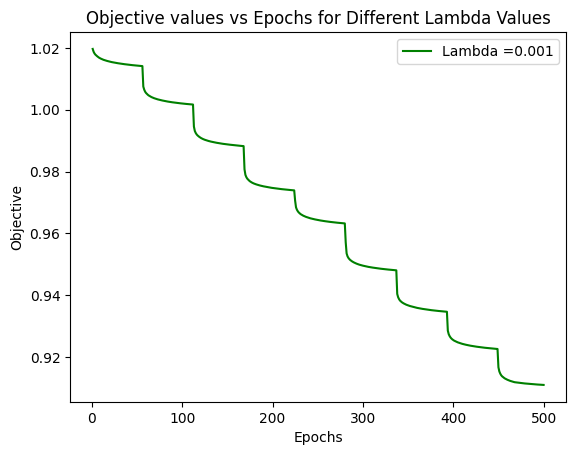

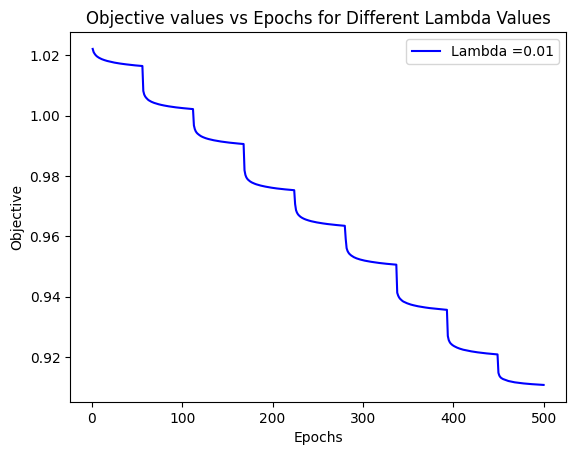

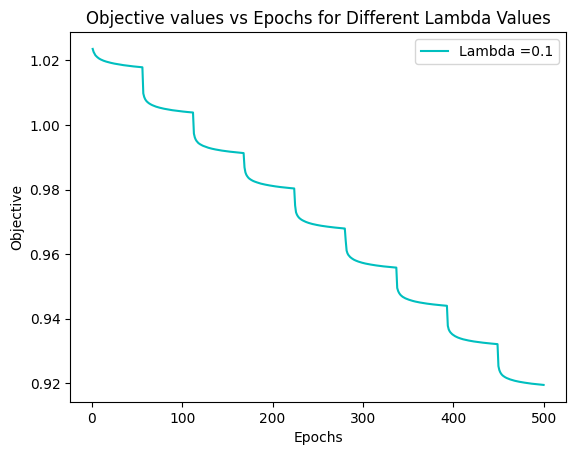

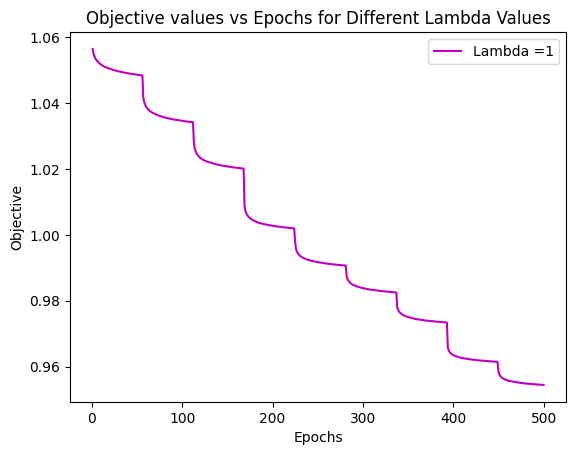

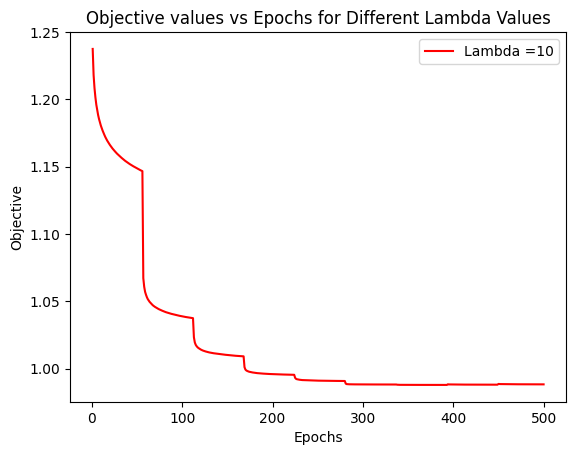

In [10]:
colors = ['g', 'b', 'c', 'm', 'r']
lam=[1e-3,1e-2,1e-1,1,10]


for i, lambda_list in enumerate(obj_val):
    plt.plot(range(1, 501), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Objective')
    plt.title('Objective values vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

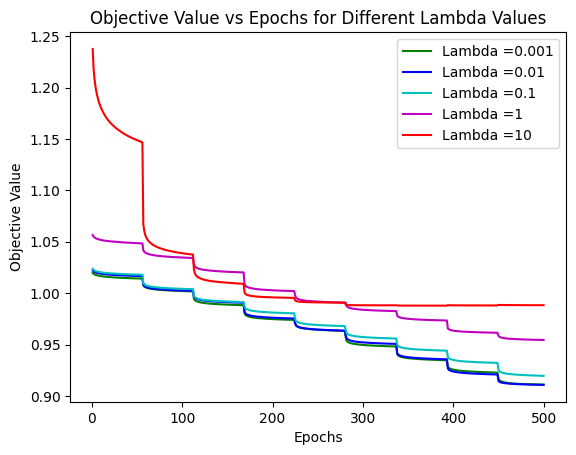

In [11]:
plot_lambda_values(obj_val)

##Observations:
Here we can see that as compared to previous closed set objective values are comparatively smaller because in case of lambda=10 for previous closed set maximum objective value was 35 but here objective value do not increases even from 2 for all lambda values

But as the number of epochs increasing the value of objective function is decreasing drastically and we can also observe that as value of lambda decreases objective value also minimises significantly

## plotting the train set accuracy in each epoch

In [12]:
def predict1(w,x):
  if w.T@x>0:
    return 1
  elif w.T@x<0:
    return -1
def accuracy1(data,label,model_w):
  k=0
  n=len(data)
  d=data.shape[1]
  for i in range(n):
    a=predict1(model_w,data[i].reshape(d,1))
    if a==label[i]:
      k+=1
  acc=float((k/n)*100)
  return acc

def set_acc(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    test_set_accuracy = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = gradient_hinge_loss(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val = accuracy1(data, label,w)
        test_set_accuracy.append(val)

    return test_set_accuracy

In [13]:
lam=[1e-3,1e-2,1e-1,1,10]
data1=train_data
label1=train_label

acc_val=[]
for i in lam:
  a1=set_acc(data1,label1,i,500)
  acc_val.append(a1)

In [14]:
import matplotlib.pyplot as plt

def plot_acc_values(acc_val):
    num_epochs = len(acc_val[0])  # Assuming all lists have the same length

    # Generate colors for each lambda value
    colors = ['b', 'g', 'r', 'c', 'm']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(acc_val):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Value of train data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

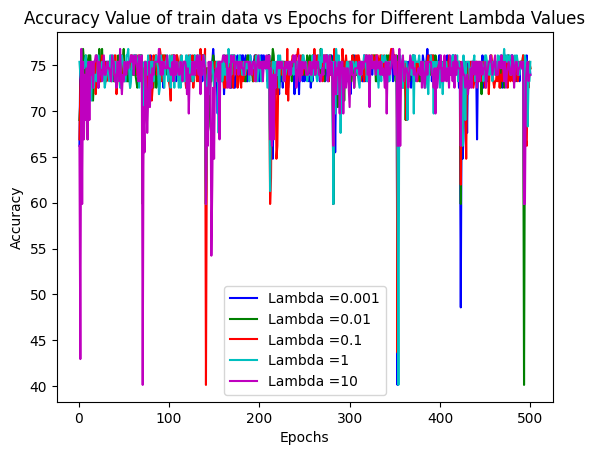

In [15]:
plot_acc_values(acc_val)

In [16]:
lam=[1e-3,1e-2,1e-1,1,10]
data2=test_data
label2=test_label

acc_val2=[]
for i in lam:
  a2=set_acc(data2,label2,i,500)
  acc_val2.append(a2)

In [17]:
def plot_acc_values2(acc_val):
    num_epochs = len(acc_val[0])  # Assuming all lists have the same length

    # Generate colors for each lambda value
    colors = ['b', 'g', 'r', 'c', 'm']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(acc_val):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Value of test data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

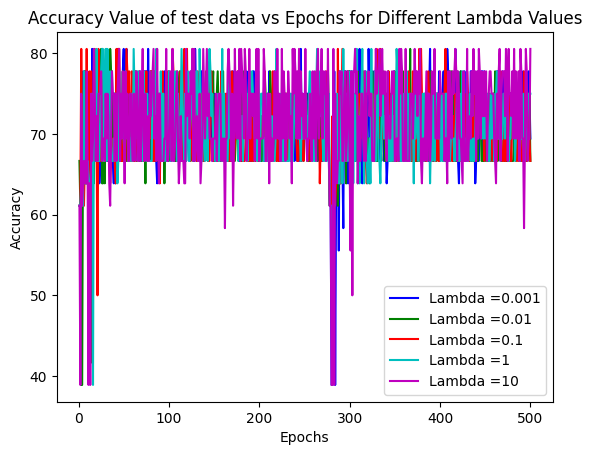

In [18]:
plot_acc_values2(acc_val2)

## Observations
for the train data accuracy is somehow between 60 to 70 percent but for test  data accuracy seems to be between 75 to 85 percent

## Tabulating the values of accuracies for each lambda values

In [19]:
for i in acc_val:
  for j in range(len(i)):
    i[j]=round(i[j],2)
for i in acc_val2:
  for j in range(len(i)):
    i[j]=round(i[j],2)




In [20]:
import pandas as pd

# Create an empty DataFrame
empty_df = pd.DataFrame()
empty_df["Lambda=0.001(Train_acc,Test_acc)"]=list(zip(acc_val[0],acc_val2[0]))
empty_df["Lambda=0.01(Train_acc,Test_acc)"]=list(zip(acc_val[1],acc_val2[1]))
empty_df["Lambda=0.1(Train_acc,Test_acc)"]=list(zip(acc_val[2],acc_val2[2]))
empty_df["Lambda=1(Train_acc,Test_acc)"]=list(zip(acc_val[3],acc_val2[3]))
empty_df["Lambda=10(Train_acc,Test_acc)"]=list(zip(acc_val[4],acc_val2[4]))
empty_df

,"Lambda=0.001(Train_acc,Test_acc)","Lambda=0.01(Train_acc,Test_acc)","Lambda=0.1(Train_acc,Test_acc)","Lambda=1(Train_acc,Test_acc)","Lambda=10(Train_acc,Test_acc)"
0,"(66.2, 61.11)","(69.01, 66.67)","(66.9, 61.11)","(75.35, 61.11)","(66.2, 61.11)"
1,"(75.35, 61.11)","(71.13, 61.11)","(72.54, 61.11)","(73.94, 61.11)","(42.96, 38.89)"
2,"(73.94, 38.89)","(71.13, 38.89)","(75.35, 80.56)","(73.24, 63.89)","(76.76, 75.0)"
3,"(72.54, 61.11)","(72.54, 38.89)","(75.35, 66.67)","(75.35, 66.67)","(59.86, 61.11)"
4,"(70.42, 77.78)","(76.76, 75.0)","(73.94, 63.89)","(75.35, 61.11)","(75.35, 63.89)"
...,...,...,...,...,...
495,"(76.06, 72.22)","(74.65, 66.67)","(66.2, 66.67)","(74.65, 69.44)","(74.65, 77.78)"
496,"(73.94, 75.0)","(73.94, 66.67)","(74.65, 69.44)","(68.31, 72.22)","(75.35, 66.67)"
497,"(73.94, 77.78)","(73.94, 69.44)","(72.54, 75.0)","(73.24, 75.0)","(73.24, 69.44)"
498,"(75.35, 75.0)","(75.35, 75.0)","(75.35, 69.44)","(73.24, 75.0)","(73.94, 69.44)"


## Part5

## Repeating the experiments when logistic loss is considered

In [21]:
def logistic_loss_gradient(y,w,x,lamda,X):
  n=len(X)
  z=1-y*w.T@x
  z_star=np.clip(z,-500,500)
  return lamda*w/n + (1/n)*(-y*x*(np.exp(z_star-1)))/(1+np.exp(z_star-1))

def squared_hinge_loss_gradient(y,w,x,lamda,X):
  n=len(X)
  z=1-y*w.T@x
  if z>0:
    return (lamda*w/n) +(1/n)*(-2*y*x)*(z)
  else:
    return lamda*w/n

In [22]:
def Objective_value_logistic(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    objective_values = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = logistic_loss_gradient(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val = objective_log(w, lambda_val, data, label)
        objective_values.append(val)

    return objective_values

In [23]:
lam=[1e-3,1e-2,1e-1,1,10]
data=A_normalized
label=transformed_label

obj_val_log=[]
for i in lam:
  b=Objective_value_logistic(data,label,i,500)
  obj_val_log.append(b)

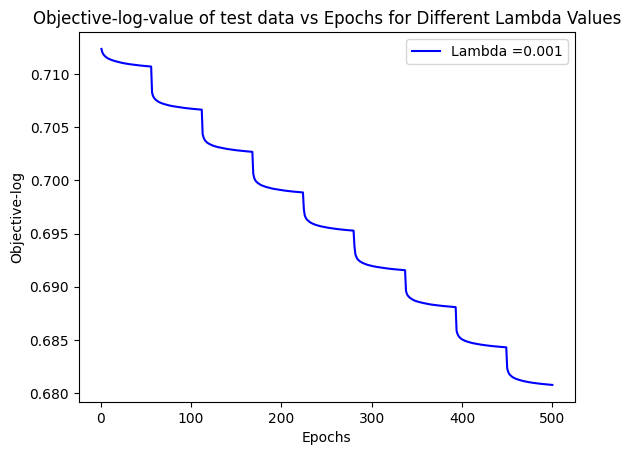

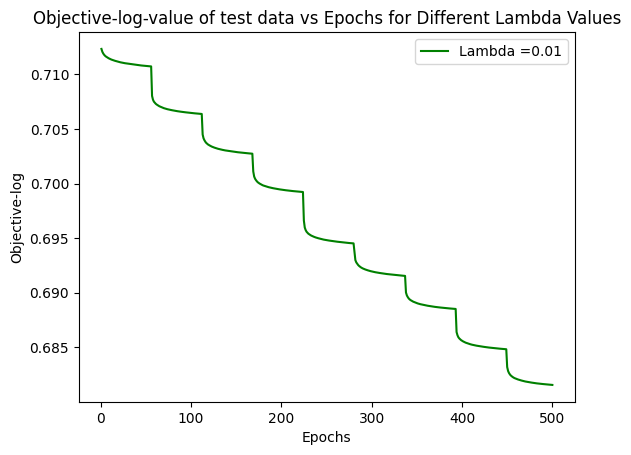

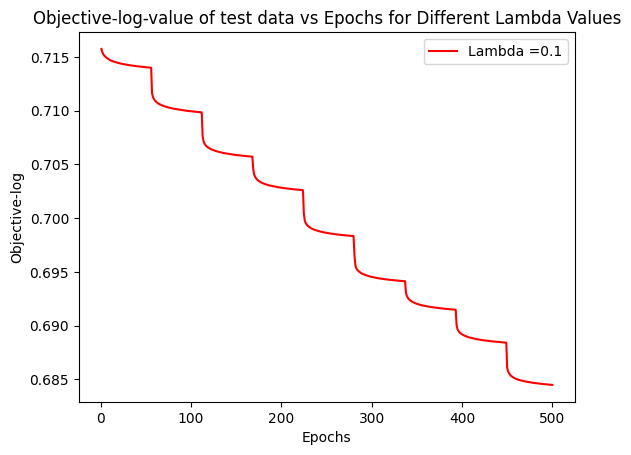

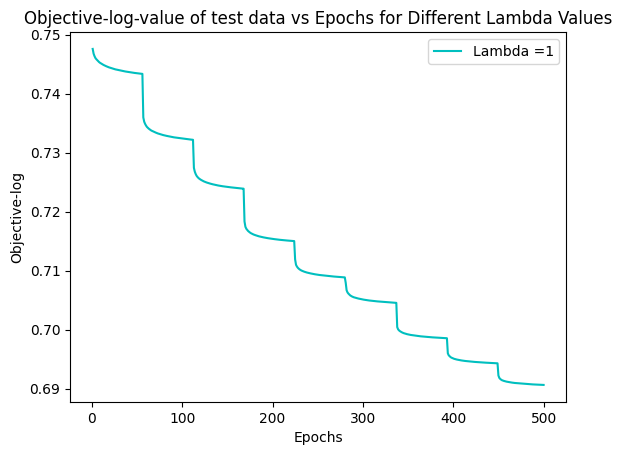

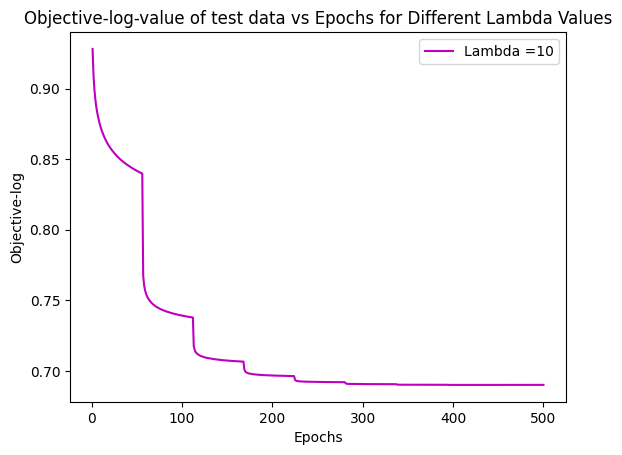

In [24]:
colors = ['b', 'g', 'r', 'c', 'm']
lam=[1e-3,1e-2,1e-1,1,10]


for i, lambda_list in enumerate(obj_val_log):
    plt.plot(range(1, 501), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Objective-log')
    plt.title('Objective-log-value of test data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

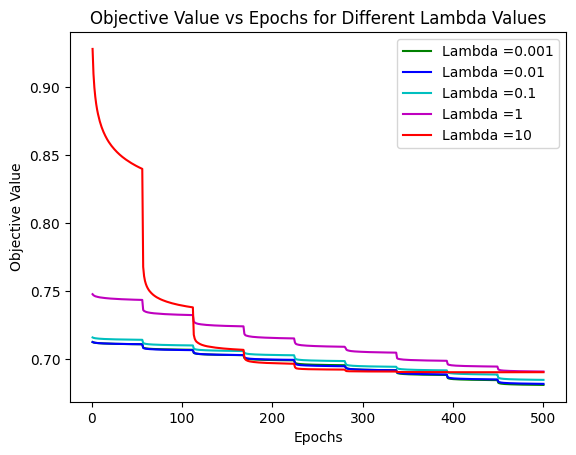

In [25]:
plot_lambda_values(obj_val_log)# specifically for log objective

In [26]:
def set_acc_logistic(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    test_set_accuracy = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = logistic_loss_gradient(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val = accuracy1(data, label,w)
        test_set_accuracy.append(val)

    return test_set_accuracy

In [27]:
lam=[1e-3,1e-2,1e-1,1,10]
data1=train_data
label1=train_label

acc_val_log=[]
for i in lam:
  c=set_acc_logistic(data1,label1,i,500)
  acc_val_log.append(c)

In [28]:
lam=[1e-3,1e-2,1e-1,1,10]
data2=test_data
label2=test_label

acc_val_log2=[]
for i in lam:
  d=set_acc_logistic(data2,label2,i,500)
  acc_val_log2.append(d)

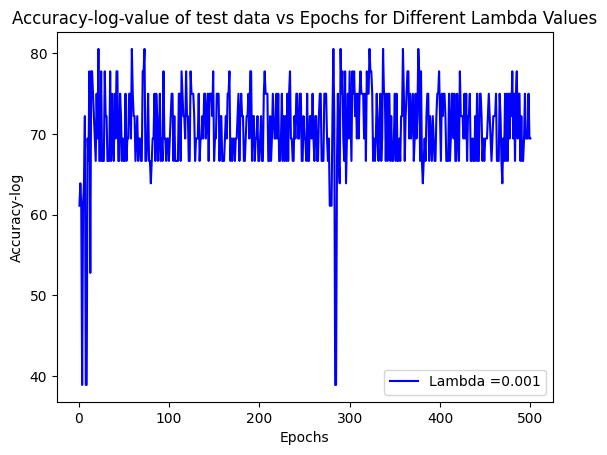

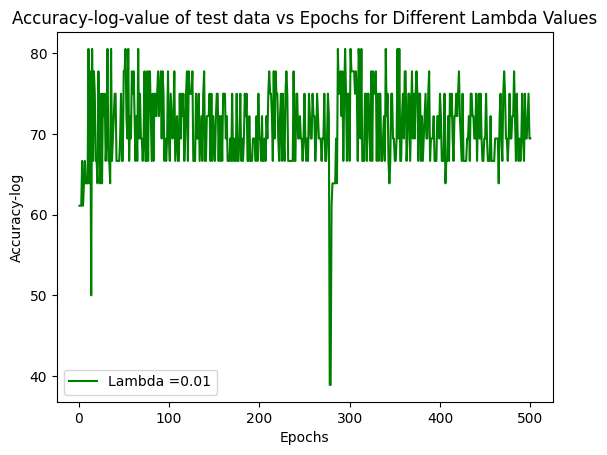

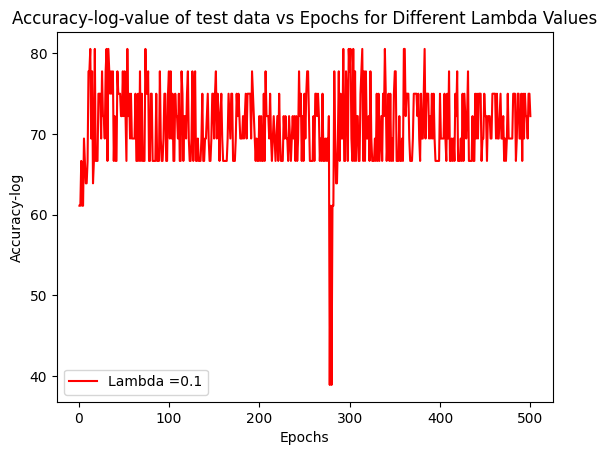

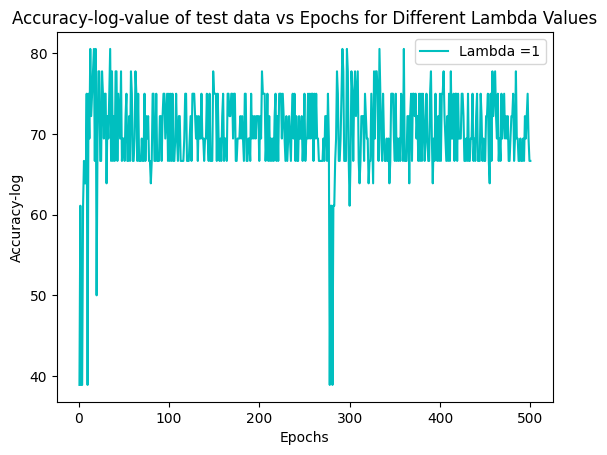

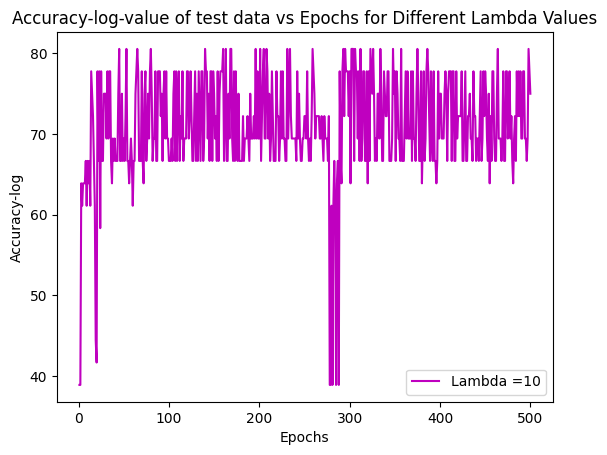

In [29]:
colors = ['b', 'g', 'r', 'c', 'm']
lam=[1e-3,1e-2,1e-1,1,10]


for i, lambda_list in enumerate(acc_val_log2):
    plt.plot(range(1, 501), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy-log')
    plt.title('Accuracy-log-value of test data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

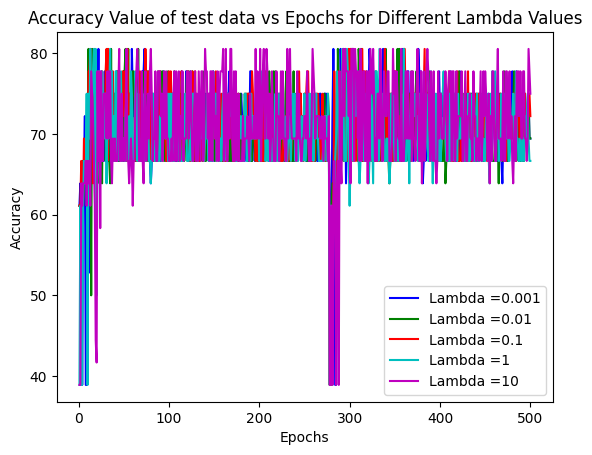

In [30]:
plot_acc_values2(acc_val_log2)

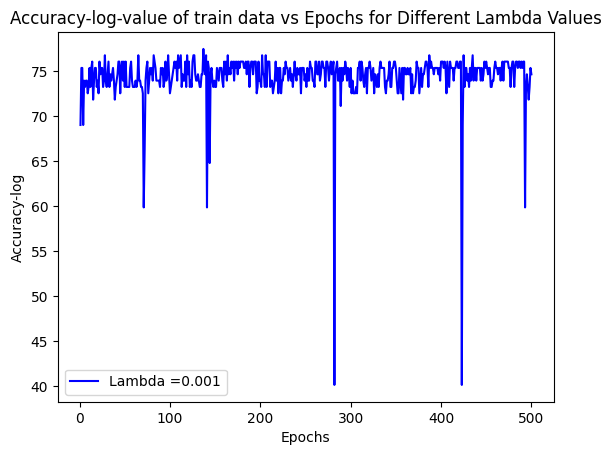

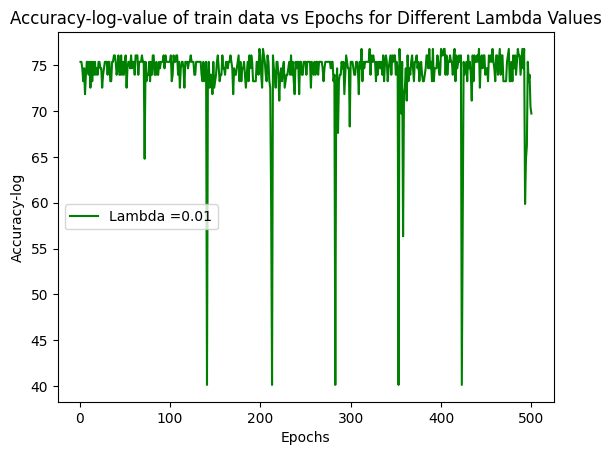

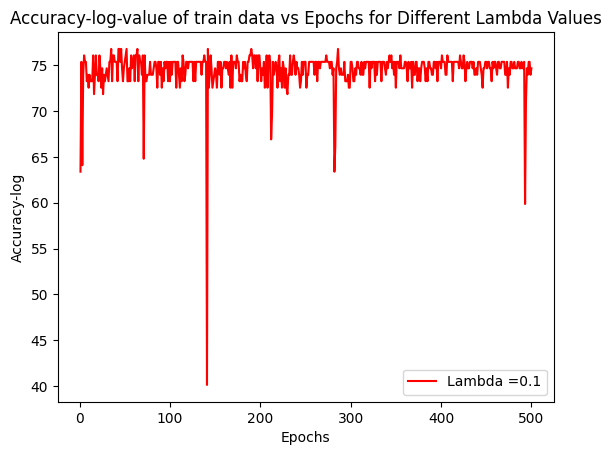

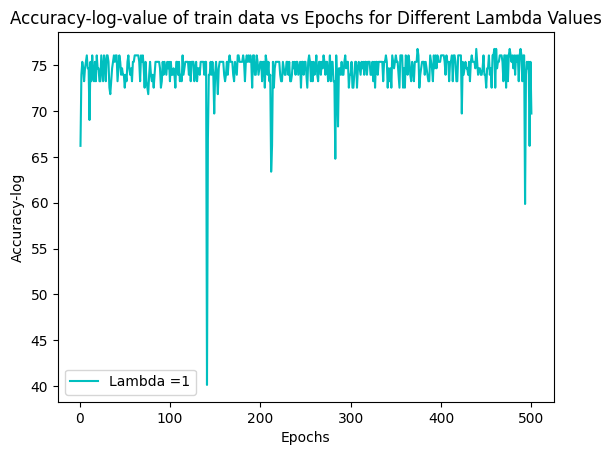

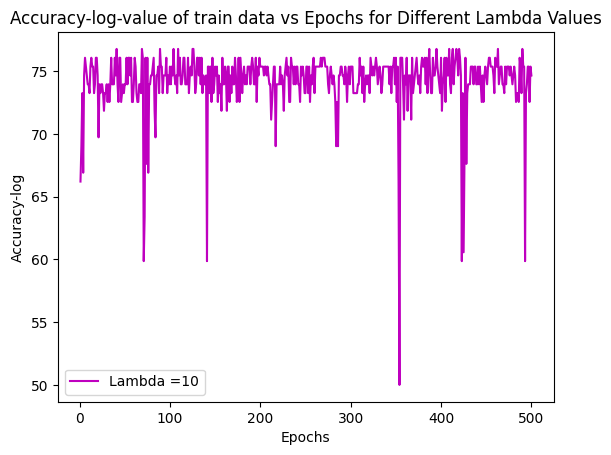

In [31]:
colors = ['b', 'g', 'r', 'c', 'm']
lam=[1e-3,1e-2,1e-1,1,10]


for i, lambda_list in enumerate(acc_val_log):
    plt.plot(range(1, 501), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy-log')
    plt.title('Accuracy-log-value of train data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

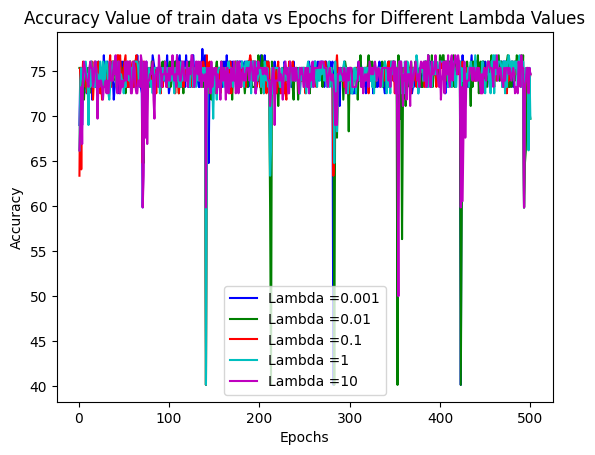

In [32]:
plot_acc_values(acc_val_log)

## Repeatin The experiments when loss function is considerd as squared hinge

In [33]:
def Objective_value_squared(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    objective_values = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = squared_hinge_loss_gradient(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val2 = objective_squared(w, lambda_val, data, label)
        objective_values.append(val2)

    return objective_values

In [34]:
lam=[1e-3,1e-2,1e-1,1,10]
data=A_normalized
label=transformed_label

obj_val_sqr=[]
for i in lam:
  e=Objective_value_squared(data,label,i,500)
  obj_val_sqr.append(e)

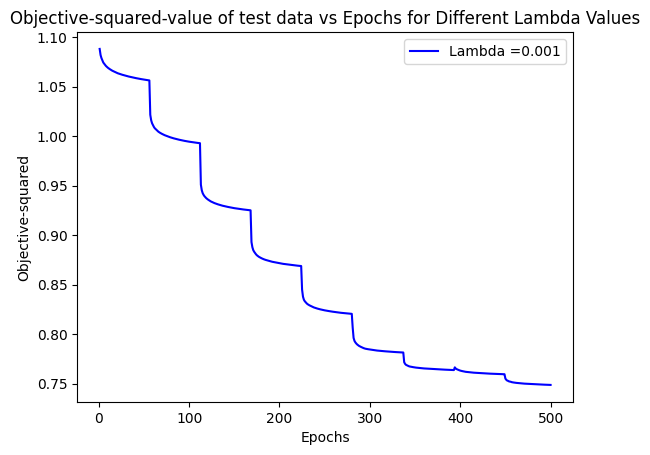

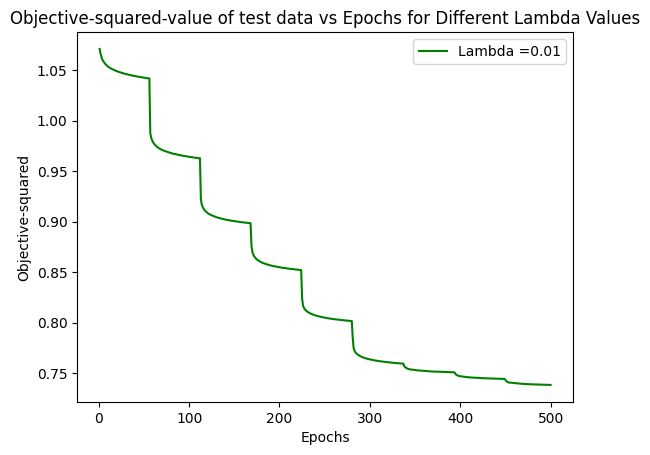

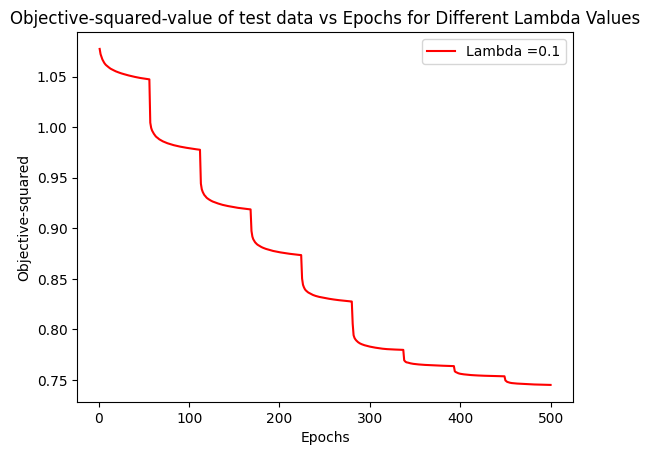

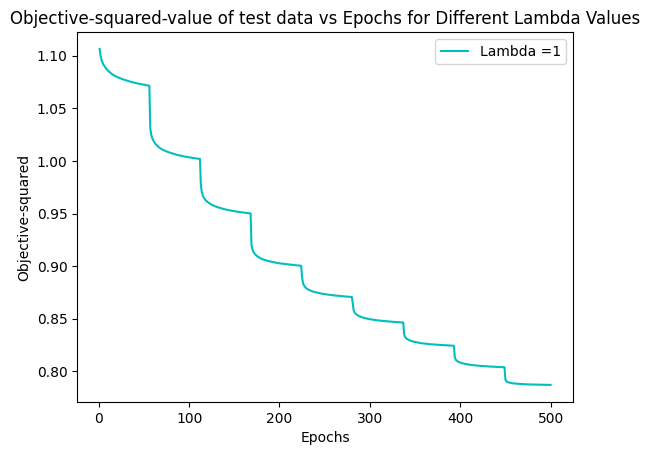

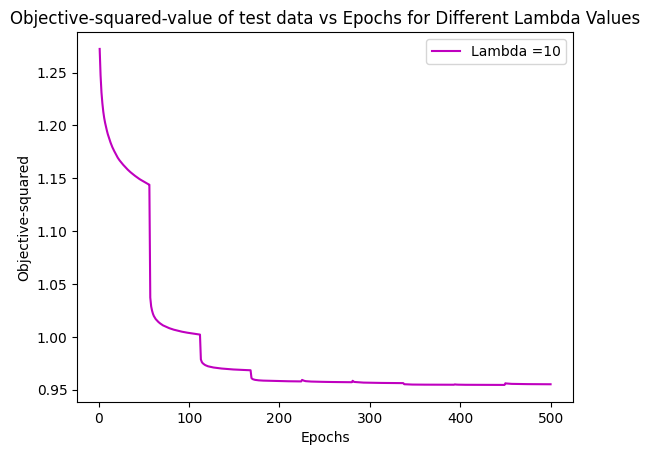

In [35]:
colors = ['b', 'g', 'r', 'c', 'm']
lam=[1e-3,1e-2,1e-1,1,10]


for i, lambda_list in enumerate(obj_val_sqr):
    plt.plot(range(1, 501), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Objective-squared')
    plt.title('Objective-squared-value of test data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

In [36]:
import matplotlib.pyplot as plt

def plot_lambda_values3(obj):
    num_epochs = len(obj[0])  # Assuming all lists have the same length

    # Generate colors for each lambda value
    colors = ['b', 'g', 'r', 'c', 'm']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(obj):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Objective Value')
    plt.title('Objective Value  of squared vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

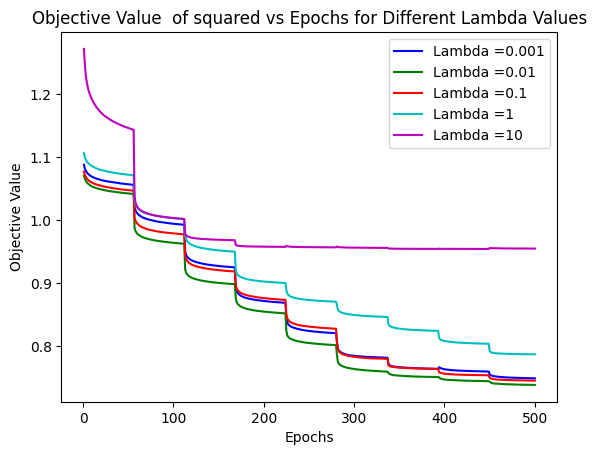

In [37]:
plot_lambda_values3(obj_val_sqr)

In [38]:
def set_acc_squared(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    test_set_accuracy = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = squared_hinge_loss_gradient(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val = accuracy1(data, label,w)
        test_set_accuracy.append(val)

    return test_set_accuracy

In [39]:
lam=[1e-3,1e-2,1e-1,1,10]
data2=test_data
label2=test_label

acc_val_sqr=[]
for i in lam:
  d1=set_acc_squared(data2,label2,i,500)
  acc_val_sqr.append(d1)

In [40]:
import matplotlib.pyplot as plt

def plot_acc_sqrtest(acc_val):
    num_epochs = len(acc_val[0])  # Assuming all lists have the same length

    # Generate colors for each lambda value
    colors = ['b', 'g', 'r', 'c', 'm']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(acc_val):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Value of test data for squared loss vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

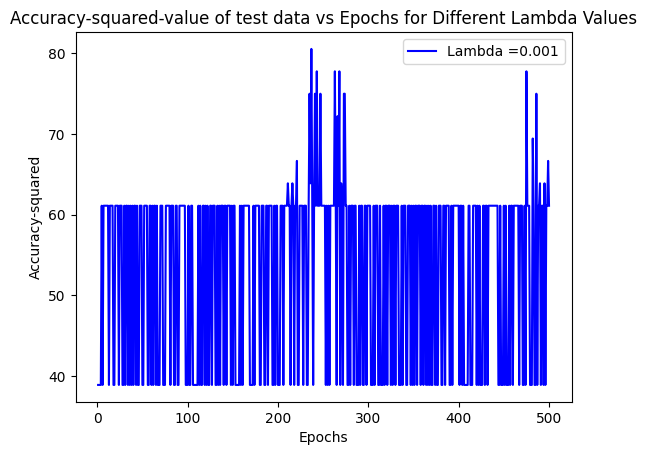

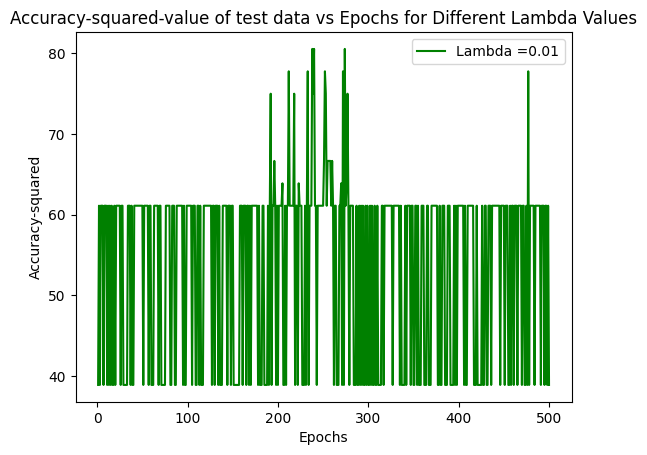

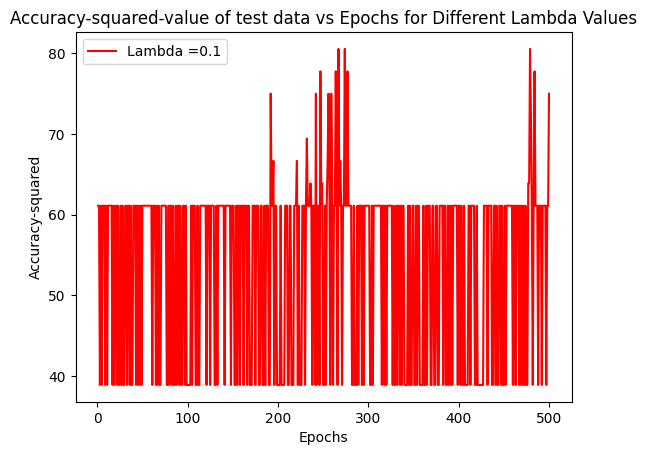

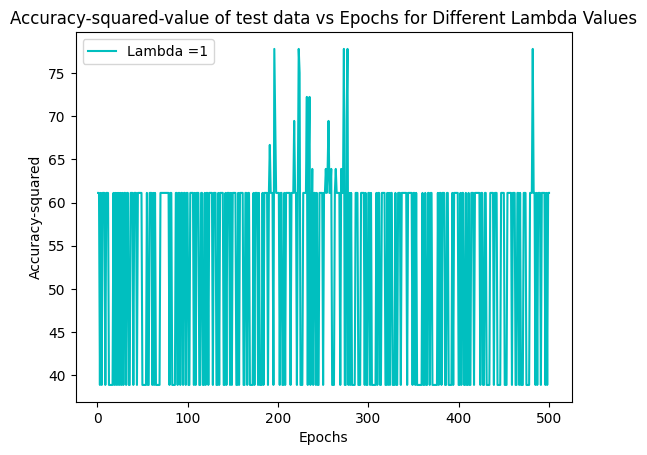

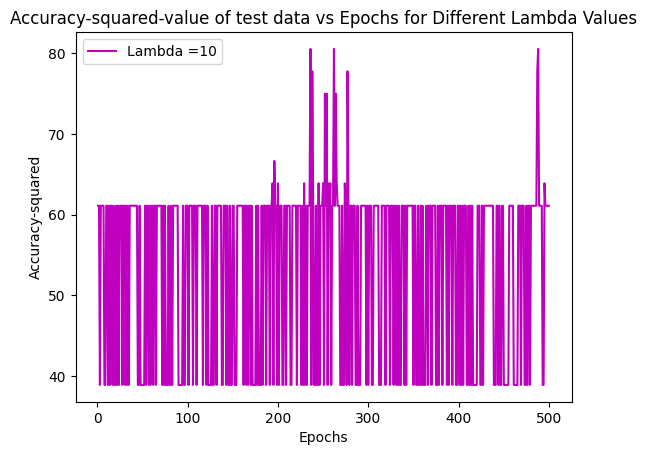

In [41]:
colors = ['b', 'g', 'r', 'c', 'm']
lam=[1e-3,1e-2,1e-1,1,10]


for i, lambda_list in enumerate(acc_val_sqr):
    plt.plot(range(1, 501), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy-squared')
    plt.title('Accuracy-squared-value of test data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

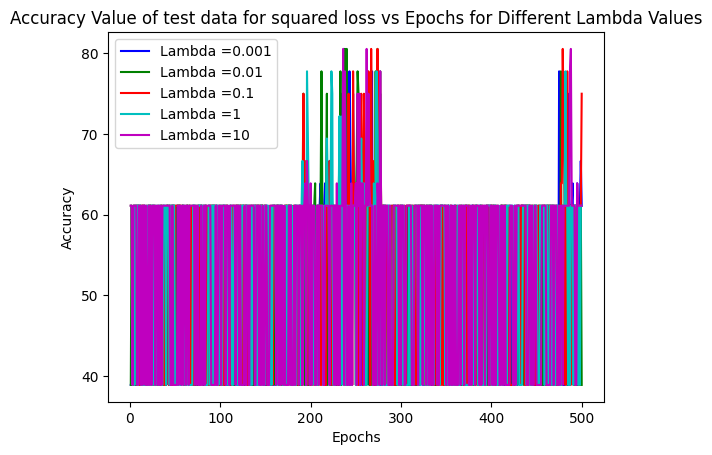

In [42]:
plot_acc_sqrtest(acc_val_sqr)

In [43]:
import matplotlib.pyplot as plt

def plot_acc_sqrtrain(acc_val):
    num_epochs = len(acc_val[0])  # Assuming all lists have the same length

    # Generate colors for each lambda value
    colors = ['b', 'g', 'r', 'c', 'm']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(acc_val):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Value of train data for squared loss vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

In [44]:
lam=[1e-3,1e-2,1e-1,1,10]
data1=train_data
label1=train_label

acc_val_sqr2=[]
for i in lam:
  d2=set_acc_squared(data1,label1,i,500)
  acc_val_sqr2.append(d2)

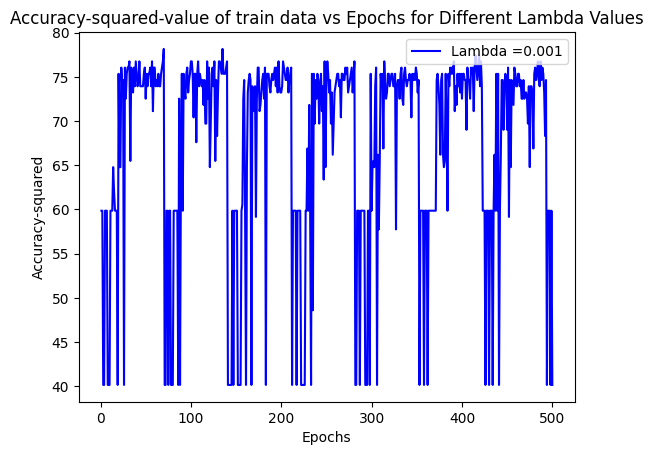

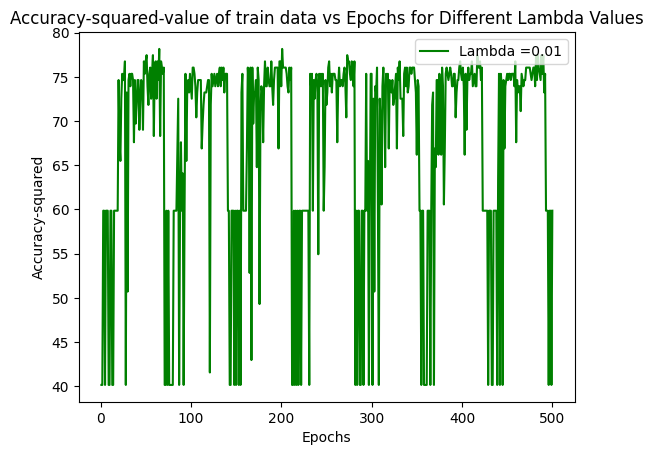

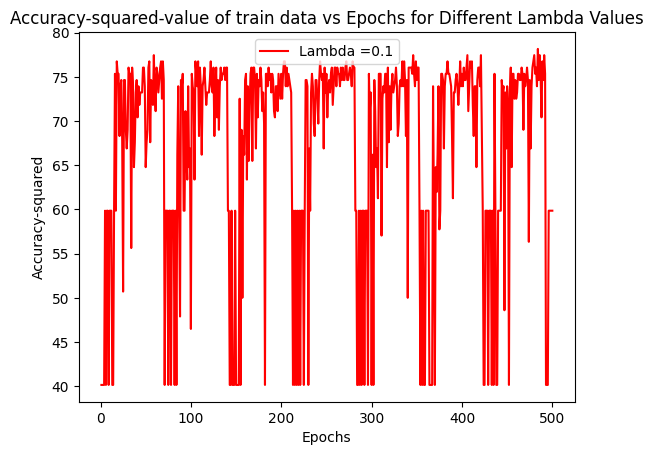

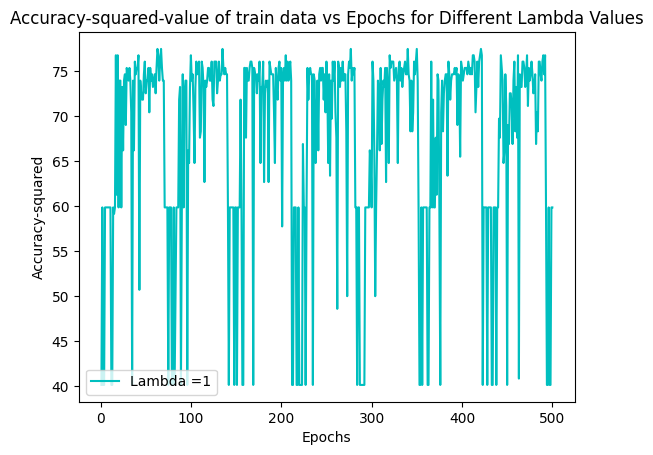

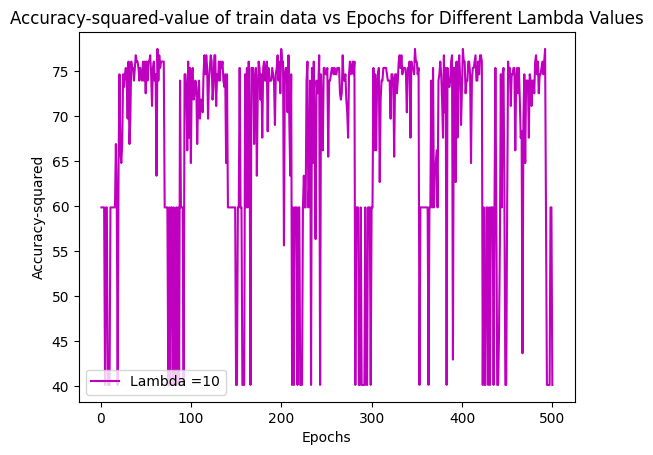

In [45]:
colors = ['b', 'g', 'r', 'c', 'm']
lam=[1e-3,1e-2,1e-1,1,10]


for i, lambda_list in enumerate(acc_val_sqr2):
    plt.plot(range(1, 501), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy-squared')
    plt.title('Accuracy-squared-value of train data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

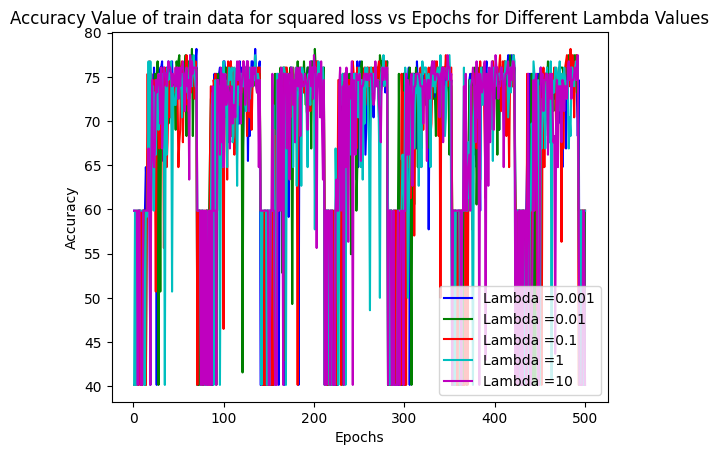

In [46]:
plot_acc_sqrtrain(acc_val_sqr2)

## Tabulating The values for squared Objective

> Indented block



In [47]:
for i in acc_val_sqr2:
  for j in range(len(i)):
    i[j]=round(i[j],2)
for i in acc_val_sqr:
  for j in range(len(i)):
    i[j]=round(i[j],2)

In [48]:
import pandas as pd

# Create an empty DataFrame
df_squared_accuracy = pd.DataFrame()
df_squared_accuracy["Lambda=0.001(Train_acc,Test_acc)"]=list(zip(acc_val_sqr2[0],acc_val_sqr[0]))
df_squared_accuracy["Lambda=0.01(Train_acc,Test_acc)"]=list(zip(acc_val_sqr2[1],acc_val_sqr[1]))
df_squared_accuracy["Lambda=0.1(Train_acc,Test_acc)"]=list(zip(acc_val_sqr2[2],acc_val_sqr[2]))
df_squared_accuracy["Lambda=1(Train_acc,Test_acc)"]=list(zip(acc_val_sqr2[3],acc_val_sqr[3]))
df_squared_accuracy["Lambda=10(Train_acc,Test_acc)"]=list(zip(acc_val_sqr2[4],acc_val_sqr[4]))
df_squared_accuracy

,"Lambda=0.001(Train_acc,Test_acc)","Lambda=0.01(Train_acc,Test_acc)","Lambda=0.1(Train_acc,Test_acc)","Lambda=1(Train_acc,Test_acc)","Lambda=10(Train_acc,Test_acc)"
0,"(59.86, 38.89)","(40.14, 38.89)","(40.14, 61.11)","(40.14, 61.11)","(59.86, 61.11)"
1,"(59.86, 38.89)","(40.14, 61.11)","(40.14, 61.11)","(59.86, 61.11)","(59.86, 61.11)"
2,"(40.14, 38.89)","(59.86, 38.89)","(40.14, 38.89)","(40.14, 38.89)","(59.86, 38.89)"
3,"(40.14, 38.89)","(59.86, 61.11)","(40.14, 61.11)","(40.14, 61.11)","(59.86, 61.11)"
4,"(59.86, 61.11)","(40.14, 61.11)","(59.86, 38.89)","(59.86, 38.89)","(40.14, 61.11)"
...,...,...,...,...,...
495,"(59.86, 38.89)","(40.14, 61.11)","(59.86, 61.11)","(59.86, 38.89)","(40.14, 61.11)"
496,"(59.86, 61.11)","(59.86, 61.11)","(59.86, 38.89)","(40.14, 61.11)","(40.14, 61.11)"
497,"(40.14, 61.11)","(59.86, 38.89)","(59.86, 61.11)","(40.14, 38.89)","(59.86, 61.11)"
498,"(59.86, 66.67)","(40.14, 61.11)","(59.86, 61.11)","(59.86, 61.11)","(59.86, 61.11)"


## Tabulating The values for Logistic Objective

In [49]:
for i in acc_val_log:
  for j in range(len(i)):
    i[j]=round(i[j],2)
for i in acc_val_log2:
  for j in range(len(i)):
    i[j]=round(i[j],2)

In [50]:
# Create an empty DataFrame
df_logistic_accuracy = pd.DataFrame()
df_logistic_accuracy["Lambda=0.001(Train_acc,Test_acc)"]=list(zip(acc_val_log[0],acc_val_log2[0]))
df_logistic_accuracy["Lambda=0.01(Train_acc,Test_acc)"]=list(zip(acc_val_log[1],acc_val_log2[1]))
df_logistic_accuracy["Lambda=0.1(Train_acc,Test_acc)"]=list(zip(acc_val_log[2],acc_val_log2[2]))
df_logistic_accuracy["Lambda=1(Train_acc,Test_acc)"]=list(zip(acc_val_log[3],acc_val_log2[3]))
df_logistic_accuracy["Lambda=10(Train_acc,Test_acc)"]=list(zip(acc_val_log[4],acc_val_log2[4]))
df_logistic_accuracy

,"Lambda=0.001(Train_acc,Test_acc)","Lambda=0.01(Train_acc,Test_acc)","Lambda=0.1(Train_acc,Test_acc)","Lambda=1(Train_acc,Test_acc)","Lambda=10(Train_acc,Test_acc)"
0,"(69.01, 61.11)","(75.35, 61.11)","(63.38, 61.11)","(66.2, 38.89)","(66.2, 38.89)"
1,"(75.35, 63.89)","(75.35, 61.11)","(75.35, 61.11)","(73.94, 61.11)","(69.01, 38.89)"
2,"(75.35, 61.11)","(74.65, 61.11)","(64.08, 66.67)","(75.35, 38.89)","(73.24, 63.89)"
3,"(69.01, 38.89)","(73.24, 66.67)","(73.94, 61.11)","(74.65, 38.89)","(66.9, 61.11)"
4,"(73.94, 61.11)","(74.65, 61.11)","(76.06, 61.11)","(73.24, 61.11)","(74.65, 63.89)"
...,...,...,...,...,...
495,"(73.24, 69.44)","(75.35, 69.44)","(73.94, 72.22)","(74.65, 72.22)","(75.35, 66.67)"
496,"(71.83, 69.44)","(73.24, 72.22)","(75.35, 69.44)","(75.35, 75.0)","(75.35, 69.44)"
497,"(73.24, 75.0)","(73.94, 75.0)","(75.35, 75.0)","(66.2, 69.44)","(72.54, 80.56)"
498,"(75.35, 69.44)","(70.42, 69.44)","(73.94, 75.0)","(75.35, 66.67)","(75.35, 77.78)"


## Observations:
here We can observe that accuracy for train and test data is greater when logistic loss is considered  as compared to accuracy for train and test data when squared loss is considered, Moreover The accuracy for squared loss is minimum among all the loses